In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('database/email_phishing_data.csv')  # Replace with your actual filename
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']               # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance by oversampling the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize kNN classifier
kNN_model = KNeighborsClassifier(n_neighbors=5)  # k=5 is the default, you can experiment with different k values

# Fit the model
kNN_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = kNN_model.predict(X_test_scaled)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test Accuracy: 0.946428798252188

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    155369
           1       0.12      0.47      0.19      2085

    accuracy                           0.95    157454
   macro avg       0.55      0.71      0.58    157454
weighted avg       0.98      0.95      0.96    157454

Confusion Matrix:
 [[148049   7320]
 [  1115    970]]


k=1, Mean Accuracy=0.9793340135929881, Time taken=47.8879 seconds
k=2, Mean Accuracy=0.9755081020648058, Time taken=50.6914 seconds
k=3, Mean Accuracy=0.9688203428429173, Time taken=51.5648 seconds
k=4, Mean Accuracy=0.9657254077283935, Time taken=56.1318 seconds
k=5, Mean Accuracy=0.9598431019431978, Time taken=62.1532 seconds
k=6, Mean Accuracy=0.9586914664072419, Time taken=59.5015 seconds
k=7, Mean Accuracy=0.953329120919966, Time taken=57.9596 seconds
k=8, Mean Accuracy=0.9527498553754741, Time taken=61.1399 seconds
k=9, Mean Accuracy=0.9475047434297282, Time taken=62.8637 seconds
k=10, Mean Accuracy=0.947172355280304, Time taken=62.5337 seconds
k=11, Mean Accuracy=0.9424568574828058, Time taken=59.4186 seconds
k=12, Mean Accuracy=0.9425492645130248, Time taken=55.2131 seconds
k=13, Mean Accuracy=0.9380875402057484, Time taken=58.8537 seconds
k=14, Mean Accuracy=0.9381137450477647, Time taken=65.3138 seconds
k=15, Mean Accuracy=0.934174738707983, Time taken=66.5258 seconds
k=16, M

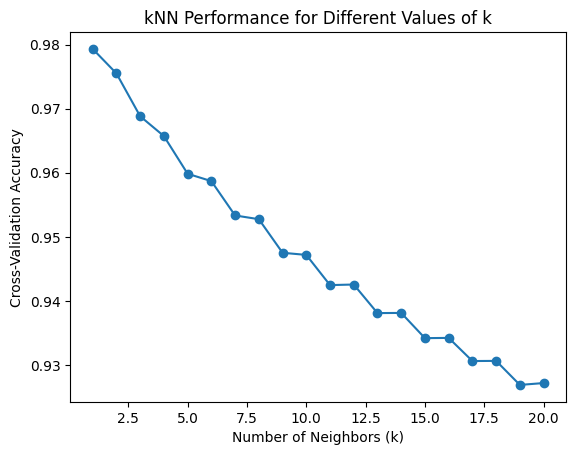

Best value of k: 1


In [4]:
from sklearn.model_selection import cross_val_score
import time

# Try different values of k
k_values = range(1, 21)  # Check for k = 1 to 20
mean_scores = []

for k in k_values:
    start_time = time.time()
    kNN_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kNN_model, X_resampled, y_resampled, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())
    end_time = time.time()
    print(f"k={k}, Mean Accuracy={scores.mean()}, Time taken={end_time - start_time:.4f} seconds")


# Plot the results
import matplotlib.pyplot as plt

plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('kNN Performance for Different Values of k')
plt.show()

# Optimal k will be the one with the highest mean accuracy
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f"Best value of k: {best_k}")


Learnings:
1. Quick Training, faster experimentation
2. k=5 default, led to 
```
Test Accuracy: 0.946428798252188

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    155369
           1       0.12      0.47      0.19      2085

    accuracy                           0.95    157454
   macro avg       0.55      0.71      0.58    157454
weighted avg       0.98      0.95      0.96    157454

Confusion Matrix:
 [[148049   7320]
 [  1115    970]]
```
3. Finding the best K now, k = 1 seems to be the best k in k = 1 to 20 
```
Test Accuracy: 0.9750657334840652

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    155369
           1       0.23      0.38      0.29      2085

    accuracy                           0.98    157454
   macro avg       0.61      0.68      0.64    157454
weighted avg       0.98      0.98      0.98    157454

Confusion Matrix:
 [[152731   2638]
 [  1288    797]]
 ```